In [1]:
using PyPlot
using Interact

In [2]:
function naca4(m, p, tc, n)

    # normalize inputs
    tc = tc/100.0
    m = m/100.0
    p = p/10.0
    
    # x discretization
    x = linspace(0, 1, n)
    
    # thickness
    tau = 5*tc*(0.2969*sqrt.(x) - 0.1260*x - 0.3516*x.^2 + 0.2843*x.^3 - 0.1015*x.^4)

    # camber
    yc = zeros(x)
    if p != 0
        idx = x .<= p
        yc[idx] = m/p^2*(2*p*x[idx] - x[idx].^2)
        idx = x .> p
        yc[idx] = m/(1-p)^2*(1-2*p + 2*p*x[idx] - x[idx].^2)
    end

    # upper and lower surface
    yu = yc + tau
    yl = yc - tau
    
    return x, yu, yl
end

naca4 (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(1: "input" = 4 Any , "m", 4, "4", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(0, "0"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(1, "1")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(3: "input-2" = 4 Any , "p", 4, "4", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(0, "0"),Pair{Any,Any}(4, "4"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(3, "3"),Pair{Any,Any}(5, "5"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(6, "6"),Pair{Any,Any}(1, "1")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(5: "input-3" = 12 Any , "tc", 12, "12", 13, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(18, "18"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(16, "16"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(21, "21"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(25, "25")…)), Any[], Any[], true, "horizontal")

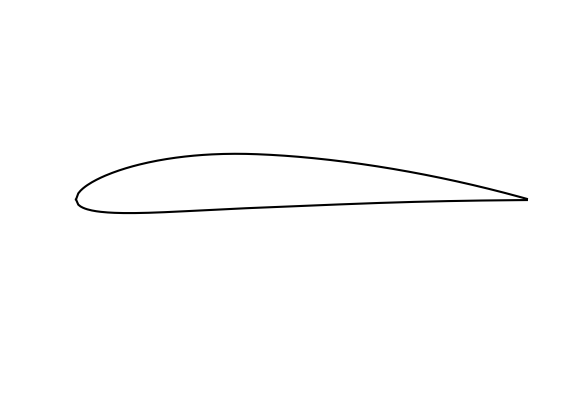

In [3]:
n = 200
f = figure()

@manipulate for m=0:1:9, p=0:1:9, tc=0:1:25; withfig(f) do
        x, yu, yl = naca4(m, p, tc, n)
        plot(x, yu, "k")
        plot(x, yl, "k")
        
        xlim([-0.05, 1.05])
        ylim([-0.4, 0.4])
        axis("off")
    end
end
